# Preparations

In [1]:
# All code is written in Python 3.11.5, and the necessary libraries are imported below.
# Data handling and analysis libraries
import numpy as np
import pandas as pd
# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud # For genearting word clouds from text data
# Text processing and feature extraction libraries
import re # For regular expressions operations
from collections import Counter # For counting frequency of words in text
from string import punctuation # For accessing standard punctuation marks
from langdetect import detect # For detecting language in a given text
from unidecode import unidecode # For converting Unicode text to ASCII
from sklearn.feature_extraction.text import TfidfVectorizer # For converting text data into TF-IDF feature vectors
# Natural Language Processing (NLP) libraries
import nltk # For various NLP tasks
nltk.download('punkt') 
from nltk.tokenize import word_tokenize, sent_tokenize # For splitting text into words and sentences
from nltk.corpus import wordnet # For accessing WordNet lexical database
from nltk.corpus import stopwords # For filtering out common stopwords in text
from nltk.stem import WordNetLemmatizer # Fore lemmatizing words to their base or dictionary form

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/gulyagurbanova/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data Handling and Filtering

In [2]:
# Function to deal with dates with multiple formats
def parse_date(date_str):
    formats = ['%d/%m/%Y', '%Y-%m-%d']
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Returns Not a Time if none of the formats match

# Reading the original CSV file
df = pd.read_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/detailed review data.csv')

# Applying the date parsing function to the 'date' column
df['date'] = df['date'].apply(parse_date)

# Defining the date range (3 years time)
start_date = pd.to_datetime('22/03/2021', format='%d/%m/%Y')
end_date = pd.to_datetime('22/03/2024', format='%d/%m/%Y')

# Filtering the dataframe for dates within the specified range
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)].copy()

# Converting dates back to the specified format
filtered_df.loc[:, 'date'] = filtered_df['date'].dt.strftime('%d/%m/%Y')

# Saving the filtered dataframe to a new CSV file 
filtered_df.to_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/filtered_file.csv.gz', index=False, compression='gzip', encoding='utf-8')
print('Filtered CSV file has been saved successfully.')

# Reading the filtered CSV file back into a new dataframe
df = pd.read_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/filtered_file.csv.gz', compression='gzip', encoding='utf-8', low_memory=False)
print('Filtered CSV file has been read successfully.')

Filtered CSV file has been saved successfully.
Filtered CSV file has been read successfully.


In [3]:
# Data types
df.dtypes

listing_id        object
id               float64
date              object
reviewer_id      float64
reviewer_name     object
comments          object
dtype: object

# Dataset Overview

In [4]:
# Review dataset top rows
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,15420,7.555235e+08,2021-06-05,187504576.0,Pascale,A fantastic apartment which is beautifully fur...
1,15420,7.613863e+08,2021-05-23,119596131.0,Megan,We had the most amazing stay at Charlotte's pl...
2,15420,7.704672e+08,2021-06-14,111721539.0,Julian,I booked Charlotte's apartment as a surprise f...
3,15420,3.969266e+17,2021-01-07,41684971.0,Louise,I've stayed at Charlotte's place many times. S...
4,15420,3.989897e+17,2021-04-07,357578834.0,Hilary,Such a fabulous apartment in a brilliant locat...


In [5]:
# Review dataset last rows
df.tail()

,listing_id,id,date,reviewer_id,reviewer_name,comments
266432,1105090362934985066,1.114376e+18,2024-03-17,438400469.0,Anup,Had wonderful time over there.
266433,1106309197963852421,1.111502e+18,2024-03-13,483439174.0,Yat Long,Spacious and cozy apartment with two bedrooms ...
266434,1107704542773356229,1.113694e+18,2024-03-16,94224388.0,Ana,"Lovely stay, great location and very helpful. ..."
266435,1111484428234063489,1.114384e+18,2024-03-17,506530479.0,Sarah,very good at communicating and fast booking gr...
266436,1113759691139175992,1.118048e+18,2024-03-22,193425070.0,Anthony,Nice place in a great location


In [6]:
# Displaying a concise summary of the dataframe, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266437 entries, 0 to 266436
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   listing_id     266437 non-null  object 
 1   id             266429 non-null  float64
 2   date           266429 non-null  object 
 3   reviewer_id    266429 non-null  float64
 4   reviewer_name  266429 non-null  object 
 5   comments       266401 non-null  object 
dtypes: float64(2), object(4)
memory usage: 12.2+ MB


In [7]:
# Checking the number of rows in the new CSV file
num_rows = df.shape[0]
print(f'The filtered CSV file has {num_rows} rows.')

The filtered CSV file has 266437 rows.


# Data Cleaning

In [8]:
# Dropping missing values
df.dropna(inplace=True)

In [9]:
# Counting the number of rows
num_rows = df.shape[0]
print(f'The filtered CSV file after dropping missing values has {num_rows} rows.')

The filtered CSV file after dropping missing values has 266401 rows.


In [10]:
# Dropping reviewer name as it is not necessary for the analysis
df.drop(columns={'reviewer_name'}, inplace=True)
df.head(10)

,listing_id,id,date,reviewer_id,comments
0,15420,7.555235e+08,2021-06-05,187504576.0,A fantastic apartment which is beautifully fur...
1,15420,7.613863e+08,2021-05-23,119596131.0,We had the most amazing stay at Charlotte's pl...
2,15420,7.704672e+08,2021-06-14,111721539.0,I booked Charlotte's apartment as a surprise f...
3,15420,3.969266e+17,2021-01-07,41684971.0,I've stayed at Charlotte's place many times. S...
4,15420,3.989897e+17,2021-04-07,357578834.0,Such a fabulous apartment in a brilliant locat...
5,15420,4.084697e+17,2021-07-17,287544117.0,The photos do not do this beautiful Georgian h...
6,15420,4.128698e+17,2021-07-23,82780677.0,Amazing apartment and Charlotte was super help...
7,15420,4.200175e+17,2021-02-08,362544076.0,"Great location, comfortable and full of charac..."
8,15420,4.251253e+17,2021-09-08,106192052.0,Sometimes AirBnB can be deceiving. Every place...
9,15420,4.309408e+17,2021-08-17,66379176.0,"This place is fantastic. Good location, lovely..."


In [11]:
# Adding new columns (per review) useful for text mining and NLP
df['Number of Sentences']=df['comments'].apply(lambda x: len(nltk.tokenize.sent_tokenize(x)))
df['Number of Words']= df['comments'].apply(lambda x: len(x.split()))
df['Number of Characters']=df['comments'].str.len()

/Users/gulyagurbanova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


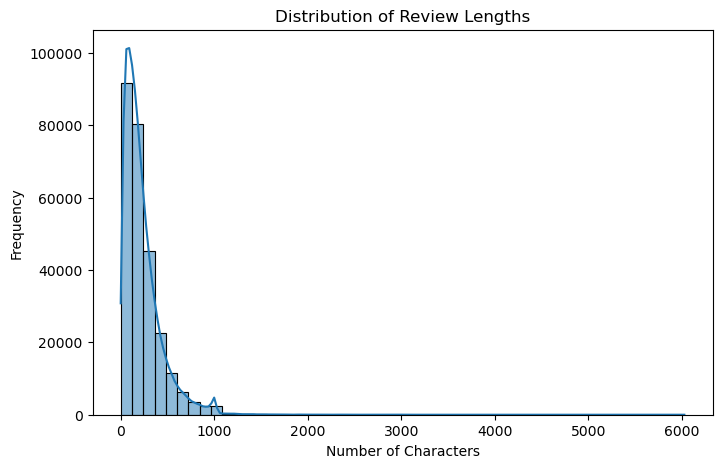

In [12]:
# Plotting the distribution of review lengths using a histogram with a KDE (Kernel Density Estimate) - gauging the typical lentgh of reviews and identify outliers
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'Number of Characters', bins = 50, kde = True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

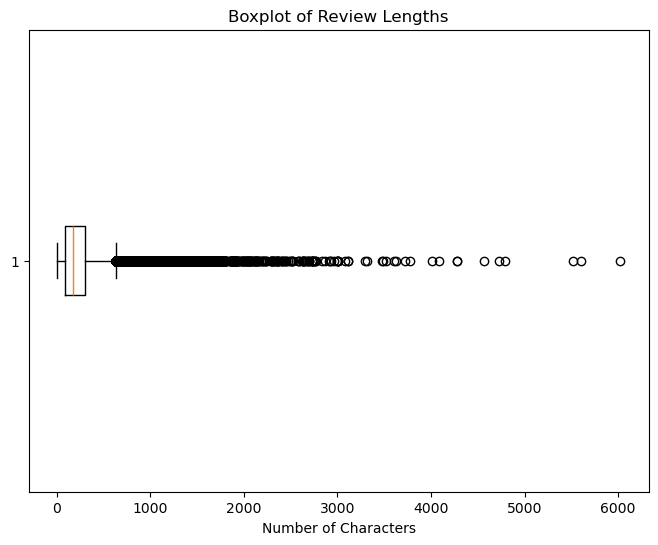

In [13]:
# Using a boxplot to examine the central tendency and variability of review lengths
plt.figure(figsize=(8, 6))
plt.boxplot(df['Number of Characters'], vert=False)
plt.title('Boxplot of Review Lengths')
plt.xlabel('Number of Characters')
plt.show()

In [14]:
# Calculating the 1st quartile (25th percentile) of the review lengths
first_quartile = df['Number of Characters'].quantile(0.25)
print(f"1st Quartile of review lengths: {first_quartile}")

# Inspecting the summary statistics
print(df['Number of Characters'].describe())

1st Quartile of review lengths: 91.0
count    266401.000000
mean        232.421233
std         209.115113
min           1.000000
25%          91.000000
50%         177.000000
75%         307.000000
max        6025.000000
Name: Number of Characters, dtype: float64


In [15]:
# Filtering the dataframe to get reviews shorter than the 1st quartile
short_reviews = df[df['Number of Characters'] < first_quartile]

# Displaying the first few reviews that are shorter than the 1st quartile
print("Reviews shorter than the 1st quartile:")
print(short_reviews[['comments', 'Number of Characters']].head(20))

Reviews shorter than the 1st quartile:
                                              comments  Number of Characters
15   Great location if traveling by train, really h...                    66
27   Fantastic apartment fantastic location fantast...                    53
43   Fantastic flat with all the comforts situated ...                    88
44   Exceptional place, great communication and so ...                    83
50   This apartment was a delight to stay in and wa...                    72
58                Fabulous Airbnb! I would recommend!!                    36
62   Great location great place to stay and the bes...                    75
105  Väldigt bra värd inga problem med någonting, g...                    89
108                      Good location and fair price.                    29
111  Fabulous flat, great location, very clear and ...                    77
113  this place was perfect, absolutely beautiful a...                    81
114  What a wonderful find! Amazing A

In [16]:
# Filtering out reviews that are shorter than the 1st quartile length
df = df[df['Number of Characters'] >= first_quartile]

# Checking the shape of the dataframe after filtering
print(f"Filtered DataFrame shape: {df.shape}")

Filtered DataFrame shape: (200593, 8)


/Users/gulyagurbanova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


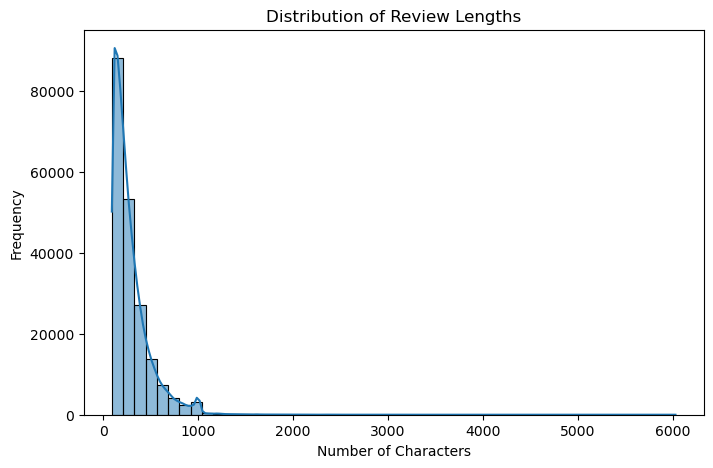

In [17]:
# Plotting the distribution of review lengths again
plt.figure(figsize = (8,5))
sns.histplot(data = df, x = 'Number of Characters', bins = 50, kde = True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Distribution of reviews per year
df['Year']= pd.DatetimeIndex(df['date']).year
ReviewDistributionDF=df.groupby(['Year']).comments.count().reset_index()
ReviewDistributionDF

,Year,comments
0,2021,27996
1,2022,65340
2,2023,94474
3,2024,12783


# Language Detection

In [19]:
# Directly identifying the language of the reviews - runtime 4 minutes
df['Lang'] = df['comments'].apply(detect)

# Generating a distribution of the detected languages
LangDistributionDF = df.groupby(['Lang']).Lang.count()

# Displaying the language distribution
print(LangDistributionDF)

Lang
af            3
ar           36
bg            7
ca           91
cs           87
cy            1
da          291
de         4207
el           39
en       177522
es         4491
et            1
fi           27
fr         8450
he           18
hr            4
hu           27
id            1
it         1500
ja           40
ko          326
lt            7
lv            6
nl         1437
no          156
pl          208
pt          736
ro           16
ru           48
sk           27
sl            8
sv          193
th            2
tr           61
uk           14
vi            2
zh-cn       479
zh-tw        24
Name: Lang, dtype: int64


In [20]:
# Distribution of languages
LangYearDistribution1=pd.DataFrame(df.groupby(['Year','Lang']).comments.count())
Lang_Year_tableDF = pd.pivot_table(LangYearDistribution1, values='comments', index=['Year'],columns=['Lang'])
Lang_Year_tableDF

Lang,af,ar,bg,ca,cs,cy,da,de,el,en,...,ru,sk,sl,sv,th,tr,uk,vi,zh-cn,zh-tw
Year,,,,,,,,,,,,,,,,,,,,,
2021,NaN,NaN,NaN,4.0,2.0,NaN,2.0,36.0,1.0,27625.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN
2022,NaN,3.0,1.0,20.0,13.0,1.0,51.0,976.0,6.0,59926.0,...,9.0,1.0,NaN,26.0,1.0,5.0,2.0,NaN,61.0,3.0
2023,3.0,29.0,4.0,55.0,58.0,NaN,226.0,2928.0,21.0,79568.0,...,33.0,21.0,7.0,155.0,1.0,49.0,11.0,2.0,334.0,18.0
2024,NaN,4.0,2.0,12.0,14.0,NaN,12.0,267.0,11.0,10403.0,...,3.0,5.0,1.0,12.0,NaN,7.0,1.0,NaN,64.0,3.0


In [21]:
# Selecting only english reviews
df=df[df['Lang']=='en']
df.head()

,listing_id,id,date,reviewer_id,comments,Number of Sentences,Number of Words,Number of Characters,Year,Lang
0,15420,7.555235e+08,2021-06-05,187504576.0,A fantastic apartment which is beautifully fur...,3,51,325,2021,en
1,15420,7.613863e+08,2021-05-23,119596131.0,We had the most amazing stay at Charlotte's pl...,6,54,332,2021,en
2,15420,7.704672e+08,2021-06-14,111721539.0,I booked Charlotte's apartment as a surprise f...,6,78,450,2021,en
3,15420,3.969266e+17,2021-01-07,41684971.0,I've stayed at Charlotte's place many times. S...,3,33,206,2021,en
4,15420,3.989897e+17,2021-04-07,357578834.0,Such a fabulous apartment in a brilliant locat...,2,19,112,2021,en


In [22]:
# Printing the number of rows after performing language detection
num_rows = df.shape[0]
print(f'After language detection CSV file has {num_rows} rows.')

After language detection CSV file has 177522 rows.


In [23]:
# Handling special characters - Converting all non-ASCII characters to ASCII in the 'comments' column
df['comments'] = df['comments'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)

In [24]:
# A detailed breakdown of the dataframe, including all column information and resource usage
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 177522 entries, 0 to 266435
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   listing_id            177522 non-null  object 
 1   id                    177522 non-null  float64
 2   date                  177522 non-null  object 
 3   reviewer_id           177522 non-null  float64
 4   comments              177522 non-null  object 
 5   Number of Sentences   177522 non-null  int64  
 6   Number of Words       177522 non-null  int64  
 7   Number of Characters  177522 non-null  int64  
 8   Year                  177522 non-null  int32  
 9   Lang                  177522 non-null  object 
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 14.2+ MB


In [25]:
# Loading the listings data and renaming the 'id' column to 'listing_id' for consistency
list_df = pd.read_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/detailed listings data.csv')
list_df.rename(columns={'id':'listing_id'}, inplace= True)

In [26]:
# Ensuring 'listing_id' is of type string in both DataFrames for accurate merging
df['listing_id'] = df['listing_id'].astype(str)
list_df['listing_id'] = list_df['listing_id'].astype(str)

In [27]:
# Displaying a summary of listings dataframe to check the structure and data types
list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_id                                    4812 non-null   object 
 1   listing_url                                   4812 non-null   object 
 2   scrape_id                                     4812 non-null   int64  
 3   last_scraped                                  4812 non-null   object 
 4   source                                        4812 non-null   object 
 5   name                                          4812 non-null   object 
 6   description                                   4709 non-null   object 
 7   neighborhood_overview                         3326 non-null   object 
 8   picture_url                                   4811 non-null   object 
 9   host_id                                       4812 non-null   i

In [28]:
# Merging the reviews dataset with the listings dataset to include additional details
df=df.merge(list_df[['listing_id','host_name','neighbourhood_cleansed','room_type','price','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']], on='listing_id', how= 'inner')

In [29]:
# Displaying the first few rows of the merged DataFrame to verify the merge was successful
df.head()

,listing_id,id,date,reviewer_id,comments,Number of Sentences,Number of Words,Number of Characters,Year,Lang,host_name,neighbourhood_cleansed,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,15420,7.555235e+08,2021-06-05,187504576.0,A fantastic apartment which is beautifully fur...,3,51,325,2021,en,Charlotte,"Old Town, Princes Street and Leith Street",Entire home/apt,$120.00,545,3.4,1,58
1,15420,7.613863e+08,2021-05-23,119596131.0,We had the most amazing stay at Charlotte's pl...,6,54,332,2021,en,Charlotte,"Old Town, Princes Street and Leith Street",Entire home/apt,$120.00,545,3.4,1,58
2,15420,7.704672e+08,2021-06-14,111721539.0,I booked Charlotte's apartment as a surprise f...,6,78,450,2021,en,Charlotte,"Old Town, Princes Street and Leith Street",Entire home/apt,$120.00,545,3.4,1,58
3,15420,3.969266e+17,2021-01-07,41684971.0,I've stayed at Charlotte's place many times. S...,3,33,206,2021,en,Charlotte,"Old Town, Princes Street and Leith Street",Entire home/apt,$120.00,545,3.4,1,58
4,15420,3.989897e+17,2021-04-07,357578834.0,Such a fabulous apartment in a brilliant locat...,2,19,112,2021,en,Charlotte,"Old Town, Princes Street and Leith Street",Entire home/apt,$120.00,545,3.4,1,58


In [30]:
# Calculating the number of unique listings in merged dataframe
unique_listings = df['listing_id'].nunique()

# Printing the total count of unique listings present
print(f"Number of unique listings: {unique_listings}")

Number of unique listings: 4154


### Review Volume Analysis

In [31]:
# Calculating the number of reviews per listing
reviews_per_listing = df.groupby('listing_id').size().reset_index(name='review_count')

# Merging the review counts back into the original dataframe. This adds the 'review_count' column to the original DataFrame, associating each review with the total number of reviews for its listing
df_with_counts = df.merge(reviews_per_listing, on='listing_id')

# Creating dataframe for listings with fewer than 5 reviews
df_few_reviews = df_with_counts[df_with_counts['review_count'] < 3]

# Creating dataframe for listings with more than 5 reviews
df_many_reviews = df_with_counts[df_with_counts['review_count'] > 3]

# Displaying the number of listings in each group
print(f"Listings with fewer than 5 reviews: {df_few_reviews['listing_id'].nunique()}")
print(f"Listings with more than 5 reviews: {df_many_reviews['listing_id'].nunique()}")

Listings with fewer than 5 reviews: 359
Listings with more than 5 reviews: 3673


In [32]:
# Setting a seed for reproducibility
np.random.seed(42)

# Sampling 10 reviews from each group
sample_few_reviews = df_few_reviews.sample(n=10, random_state=42)
sample_many_reviews = df_many_reviews.sample(n=10, random_state=42)

# Displaying the samples
print("Sample of reviews from listings with fewer than 5 reviews:")
print(sample_few_reviews[['listing_id', 'comments']])

print("\nSample of reviews from listings with more than 5 reviews:")
print(sample_many_reviews[['listing_id', 'comments']])

Sample of reviews from listings with fewer than 5 reviews:
                 listing_id                                           comments
172692   901433956752461315  I stayed for 2 nights in this apartment.<br/>T...
177497  1087712368391572360  Great value for a modern and clean house in a ...
177241  1025919914991343639  Served our purpose of a bed for the night in E...
139513             53181604  Our stay at the 'Balerno Inn' was fabulous. Co...
177499  1089989375491063296  The room felt very clean and warm, and the lan...
121835             46965090  Great stay! The property is located close to t...
161604   681323219500853046  Perfectly located apartment. Brandon  was very...
177517  1099245562738502645  Had a great stay! Location was really handy fo...
173750   918709234913675511  Great place and location. Perfect for explorin...
169451   813312630241422986  John is a very friendly and responsive host. B...

Sample of reviews from listings with more than 5 reviews:
             

# Removing Numbers, Lowecasing and Host Adjustment

In [33]:
# Function to remove numbers from a string
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Applying the function to the 'comments' column
df['comments'] = df['comments'].apply(remove_numbers)

# Checking the first few rows to ensure the numbers were removed
print(df['comments'].head())

0    A fantastic apartment which is beautifully fur...
1    We had the most amazing stay at Charlotte's pl...
2    I booked Charlotte's apartment as a surprise f...
3    I've stayed at Charlotte's place many times. S...
4    Such a fabulous apartment in a brilliant locat...
Name: comments, dtype: object


In [34]:
# Converting text to lowercase to ensure consistency, reduction of redundancy and improved matching
df['comments']=df['comments'].str.lower()
df['host_name']=df['host_name'].str.lower()

In [35]:
# Fixing errors with apostrophes
df["comments"] = df["comments"].str.replace(" '","'", regex = False)
df["comments"] = df["comments"].str.replace("' s","'s", regex =False)

In [36]:
# Aligning 'and's
df['host_name']=df['host_name'].str.replace("&","and")
df['host_name']=df['host_name'].str.replace("+","and")

In [37]:
# Filtering the dataset to find rows where the host name contains the word "and"
test=df[df['host_name'].str.contains(" and ")]
test.head()

,listing_id,id,date,reviewer_id,comments,Number of Sentences,Number of Words,Number of Characters,Year,Lang,host_name,neighbourhood_cleansed,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
2204,500696,7.545807e+08,2021-03-05,228845116.0,fabulous location <br/>friendly host <br/>nice...,1,12,92,2021,en,sue and grant,Tollcross,Entire home/apt,$90.00,370,2.57,14,18
2205,500696,7.598447e+08,2021-05-18,395797725.0,beautiful flat in a simply incredible location...,2,32,185,2021,en,sue and grant,Tollcross,Entire home/apt,$90.00,370,2.57,14,18
2206,500696,7.698080e+08,2021-06-13,79648240.0,susan was really helpful and everything went v...,2,22,129,2021,en,sue and grant,Tollcross,Entire home/apt,$90.00,370,2.57,14,18
2207,500696,3.947388e+17,2021-06-28,119785925.0,the flat is perfectly located for exploring ed...,1,24,135,2021,en,sue and grant,Tollcross,Entire home/apt,$90.00,370,2.57,14,18
2208,500696,4.012544e+17,2021-07-07,357848890.0,a perfect flat with all the home comforts in a...,1,18,100,2021,en,sue and grant,Tollcross,Entire home/apt,$90.00,370,2.57,14,18


In [38]:
# Removing records where host name is more than one to ensure matching host names in reviews and simplified analysis
df = df.drop(df[df['host_name'].str.contains(" and ")].index)

In [39]:
# Count of number of rows
num_rows = df.shape[0]
print(f'After 2 host names are removed CSV file has {num_rows} rows.')

After 2 host names are removed CSV file has 167571 rows.


# Anonymisation

In [40]:
# Replacing the name of the host with 'host' for anonymization purposes and improved text analysis
def replace(str1, str2):
    return re.sub(str2, 'host', str1)

df['comments'] = df.apply(lambda row: replace(row['comments'], row['host_name']), axis=1)

In [41]:
# Extended anonymization function to replace host names and specific pronouns with 'host' for consistency
def replace_with_host(comment, host_name):
    comment = re.sub(host_name, 'host', comment, flags=re.IGNORECASE)
    pronouns = ['he', 'she', 'him', 'her', 'his', 'hers', 'they', 'them', 'their', 'theirs', 'person', 'people', 'lady', 'hosts', 'household','communicator','campanion','hospitality','landlord']
    for pronoun in pronouns:
        comment = re.sub(r'\b' + pronoun + r'\b', 'host', comment, flags=re.IGNORECASE)
    return comment

df['comments'] = df.apply(lambda row: replace_with_host(row['comments'], row['host_name']), axis=1)

In [42]:
# Creating a dictionary to map host names to unique identifiers
host_name_to_id = {name: f'host_{i}' for i, name in enumerate(df['host_name'].unique())}

# Replacing actual host names with unique identifiers
df['host_name'] = df['host_name'].map(host_name_to_id)

# Verifying the changes
print(df['host_name'].head())

0    host_0
1    host_0
2    host_0
3    host_0
4    host_0
Name: host_name, dtype: object


# Fixing Typos

In [43]:
# Function to clean HTML tags and extra spaces
def clean_html_tags(text):
    # Remove all HTML tags
    clean_text = re.sub(r'<.*?>', ' ', text)
    # Remove any extra spaces left after removing tags
    clean_text = re.sub(r'\s+', ' ', clean_text).strip()
    return clean_text

# Applying the function to the comments column
df['comments'] = df['comments'].apply(clean_html_tags)

In [44]:
# Dictionary of replacements (errors, typos)
replacements = {
    r'\bcomfy\b': 'comfortable',
    r'\bapartments\b': 'apartment',
    r'\bairbnbs\b': 'airbnb',
    r'\bflat\b': 'apartment',
    r'\bhouse\b': 'house',
    r'\bhost place\b': 'airbnb',
    r'\bair bnb\b': 'airbnb',
    r'\bairb&b\b': 'airbnb',
    r'\bgarden home\b': 'house',
    r'\ben suite\b': 'en-suite',
    r'\b ensuite\b': 'en-suite',
    r'\bcity centre\b': 'city-centre',
    r'\bcity center\b': 'city-centre',
    r'\btown centre\b': 'town-centre',
    r'\btown center\b': 'town-centre',
    r'\baccomodating\b': 'accommodating',
    r'\bamazig\b': 'amazing',
    r'\bamazng\b': 'amazing',
    r'\bavaiable\b': 'available',
    r'\bwelcomming\b': 'welcoming',
    r'\bwondeful\b': 'wonderful',
    r'\bwounderful\b': 'wonderful',
    r'\bknowledgable\b': 'knowledgeable',
    r'\bv, helpful\b': 'helpful',
    r'\bquick, responding\b': 'responding',
    r'\bconfortable\b': 'comfortable',
    r'\bcomfotable\b': 'comfortable',
    r'\bfab\b': 'fabulous',
    r'\bcomfortable, sitting\b': 'comfortable',
    r'\bextra, comfortable\b': 'comfortable',
    r'\blovey\b': 'lovely',
    r'\bbeatiful\b': 'beautiful',
    r'\bbeautifull\b': 'beautiful',
    r'\bicnredible\b': 'incredible',
    r'\bhelful\b': 'helpful',
    r'\bgraet\b': 'great',
    r'\bextreme, responsive\b': 'responsive',
    r'\bking, comfortable\b': 'comfortable',
    r'\bnice, stylish\b': 'stylish',
    r'\bairbnb home\b': 'home',
    r'\brecomend\b': 'recommend',
    r'\brecomendable\b': 'recommendable',
    r'\brecomended\b': 'recommended',
    r'\bdeff\b': 'definitely',
    r'\bdef\b': 'definitely',
    r'\bu\b': 'you',
    r'\blivingroom\b': 'living room',
    r'\bcomfiest\b': 'most comfortable',
    r'\bdin room\b': 'dining room',
    r'\bdefinately\b': 'definitely',
    r'\b(?:jack|craig|fiona|wendy|vixy|kate|jessica|anna|louise|andrew|josef|nicole|challote|matty|marius)\b(?:\'s)?': 'host',
    r'\buber\b': 'taxi',
    r'\bubers\b': 'taxi',
    r':\)': 'happy',
    r'\bxx\b': '',
    r'\bair bandb\b': 'airbnb',
    r'\bair bnbs\b': 'airbnb',
    r'\bbnb\b': 'airbnb',
    r'\btiddy\b': 'tidy',
    r'\bca\s+n\'t\b': "can't"
}

# Applying the replacements 
for pattern, replacement in replacements.items():
    df['comments']=df['comments'].str.replace(pattern, replacement, regex=True)

# Additional replacement for '&' to 'and'
df['comments'] = df['comments'].str.replace("&", "and")

In [45]:
# Creating a new column to indicate whether the word 'host' is mentioned in the review
df['Host']=df['comments'].str.contains("host")

# Creating another column to count the frequency of the word 'host' in each review
df['Host freq']=list(map(lambda x: x.count('host'), df['comments']))

In [46]:
# Displaying summary statistics for the 'Host freq' column to understand the distribution of 'host' mentions in reviews
summary_stats = df['Host freq'].describe()

# Printing the summary statistics with a header
print("Summary Statistics for the Number of 'host' Mentions in Reviews:")
print(summary_stats)

Summary Statistics for the Number of 'host' Mentions in Reviews:
count    167571.000000
mean          1.295343
std           1.576215
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          88.000000
Name: Host freq, dtype: float64


In [47]:
# Displaying the first few rows of the dataframe to inspect recent modifications
df.head()

,listing_id,id,date,reviewer_id,comments,Number of Sentences,Number of Words,Number of Characters,Year,Lang,host_name,neighbourhood_cleansed,room_type,price,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Host,Host freq
0,15420,7.555235e+08,2021-06-05,187504576.0,a fantastic apartment which is beautifully fur...,3,51,325,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,$120.00,545,3.4,1,58,False,0
1,15420,7.613863e+08,2021-05-23,119596131.0,we had the most amazing stay at host's place. ...,6,54,332,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,$120.00,545,3.4,1,58,True,2
2,15420,7.704672e+08,2021-06-14,111721539.0,i booked host's apartment as a surprise for my...,6,78,450,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,$120.00,545,3.4,1,58,True,3
3,15420,3.969266e+17,2021-01-07,41684971.0,i've stayed at host's place many times. so com...,3,33,206,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,$120.00,545,3.4,1,58,True,2
4,15420,3.989897e+17,2021-04-07,357578834.0,such a fabulous apartment in a brilliant locat...,2,19,112,2021,en,host_0,"Old Town, Princes Street and Leith Street",Entire home/apt,$120.00,545,3.4,1,58,True,1


# Saving New DF

In [48]:
# Checking the final number of rows in the preprocessed df
df.shape[0]

167571

In [49]:
# Saving the preprocessed df to a CSV file
df.to_csv('/Users/gulyagurbanova/Desktop/uom/extended research/data/processed_reviews_first.csv', index=False)
print('Final preprocessed DataFrame has been save to data folder')

Final preprocessed DataFrame has been save to data folder


In [50]:
# Displaying a summary of the dataframe to confirm the structure and data types after first part of preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167571 entries, 0 to 177521
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   listing_id                      167571 non-null  object 
 1   id                              167571 non-null  float64
 2   date                            167571 non-null  object 
 3   reviewer_id                     167571 non-null  float64
 4   comments                        167571 non-null  object 
 5   Number of Sentences             167571 non-null  int64  
 6   Number of Words                 167571 non-null  int64  
 7   Number of Characters            167571 non-null  int64  
 8   Year                            167571 non-null  int32  
 9   Lang                            167571 non-null  object 
 10  host_name                       167571 non-null  object 
 11  neighbourhood_cleansed          167571 non-null  object 
 12  room_type            

# Initial Visualisations

In [51]:
# Overall count of listings
total_listings = df['listing_id'].nunique()
print(f'Total number of unique listings: {total_listings}')

Total number of unique listings: 3993


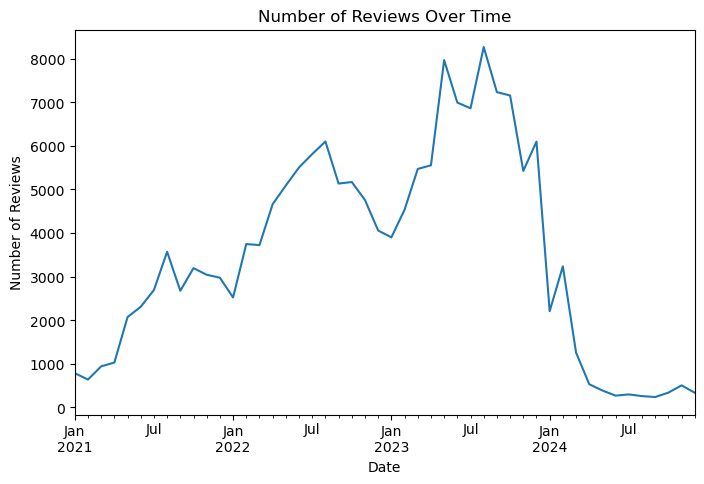

In [52]:
# Monitoring the number of reviews over time (per month) - can reveal trends and seasonal patterns in customer feedback
df['date'] = pd.to_datetime(df['date'])
reviews_over_time = df.groupby(df['date'].dt.to_period('M')).size()

plt.figure(figsize=(8,5))
reviews_over_time.plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

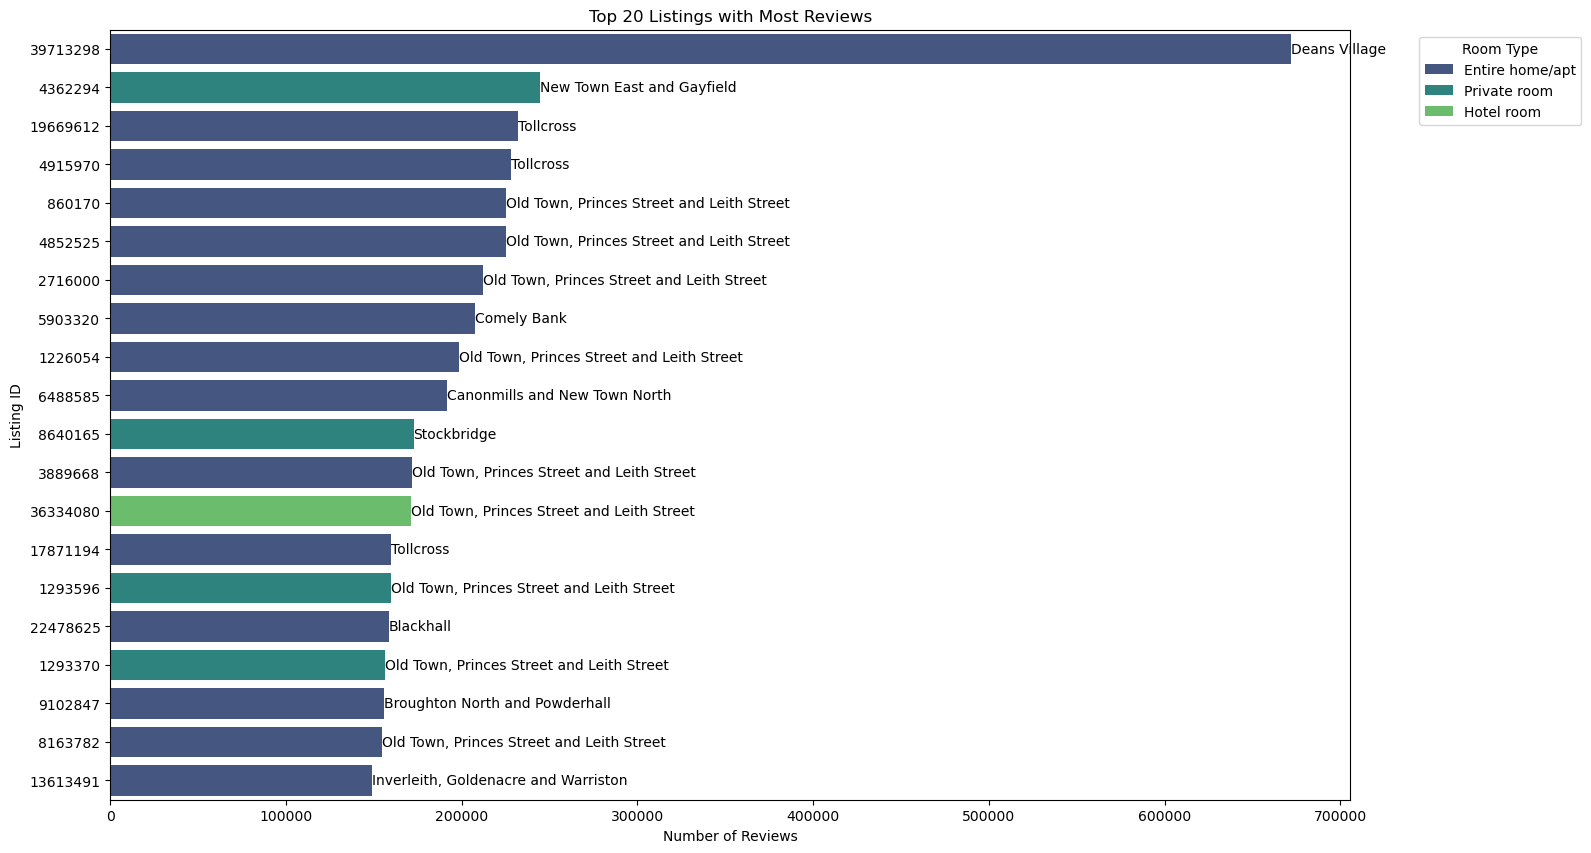

In [61]:
# Ensuring the number_of_reviews column is of integer type
df['number_of_reviews'] = df['number_of_reviews'].astype(int)

# Grouping by listing_id and sum the number of reviews for each listing
top_20_reviews = df.groupby('listing_id')['number_of_reviews'].sum().nlargest(20).reset_index()

# Dropping duplicates to ensure unique 'listing_id' entries
df_unique = df[['listing_id', 'room_type', 'neighbourhood_cleansed']].drop_duplicates('listing_id')

# Merge with the unique DataFrame to get room_type and neighborhood
top_20_reviews = top_20_reviews.merge(df_unique, on='listing_id', how='left')

plt.figure(figsize=(16, 10))
sns.barplot(x='number_of_reviews', y='listing_id', data=top_20_reviews, hue='room_type', dodge=False, palette='viridis')

# Adding text annotations for neighborhoods
for index, row in top_20_reviews.iterrows():
    plt.text(row.number_of_reviews, index, row.neighbourhood_cleansed, color='black', ha='left', va='center')

plt.title('Top 20 Listings with Most Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Listing ID')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

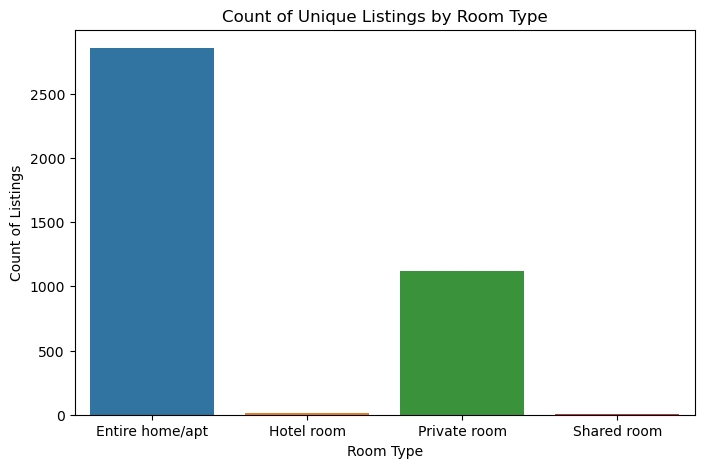

In [54]:
# Plotting the count of listings by room type
unique_listings_by_room_type = df.groupby('room_type')['listing_id'].nunique().reset_index()
unique_listings_by_room_type = unique_listings_by_room_type.rename(columns={'listing_id':'unique_listings'})

plt.figure(figsize = (8,5))
sns.barplot(data=unique_listings_by_room_type, x='room_type', y='unique_listings')
plt.title('Count of Unique Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count of Listings')
plt.show()

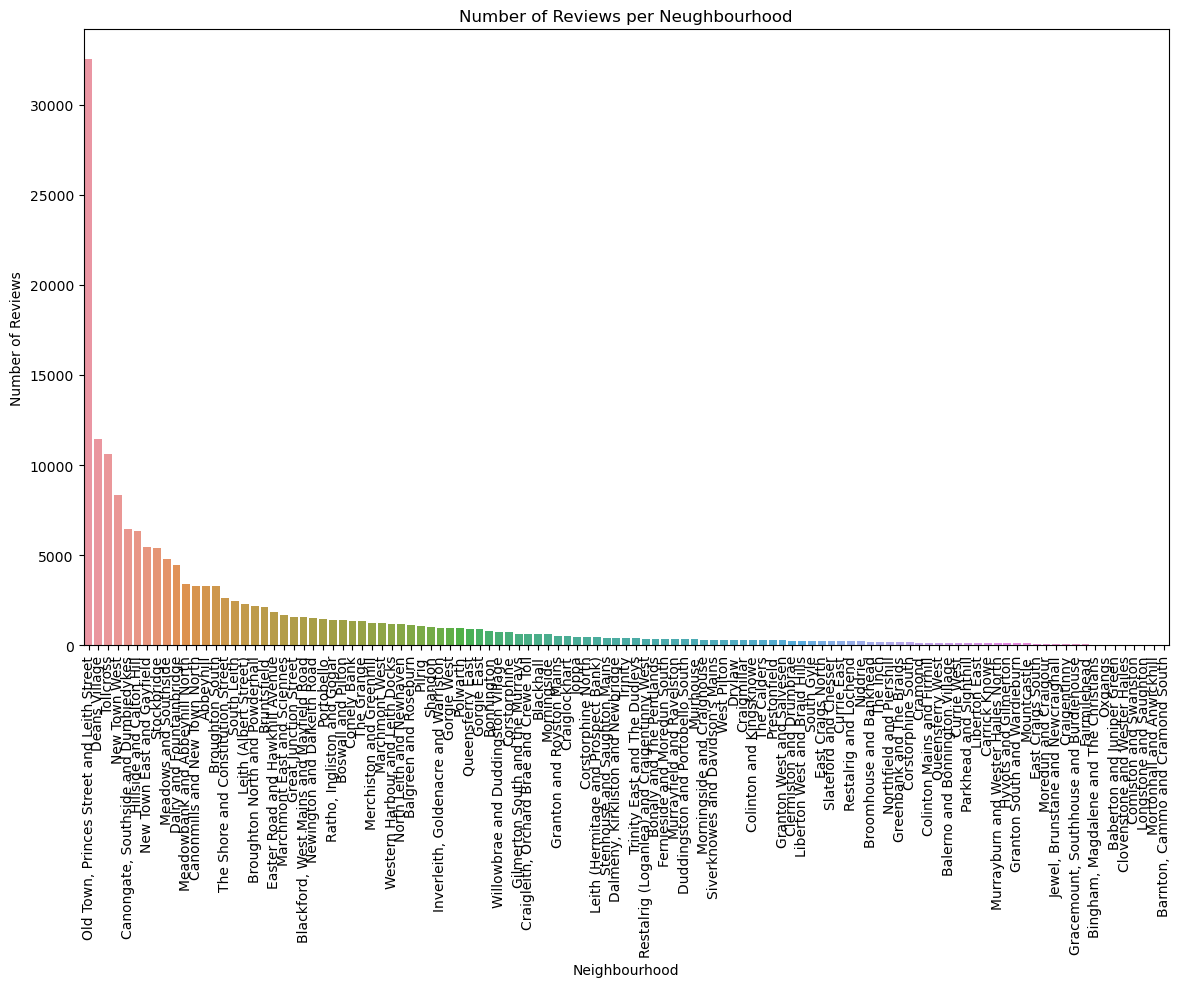

In [55]:
# Most popular neighbourhoods
plt.figure(figsize = (14,8))
sns.countplot(data=df, x='neighbourhood_cleansed', order = df['neighbourhood_cleansed'].value_counts().index)
plt.title('Number of Reviews per Neughbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=90)
plt.show()

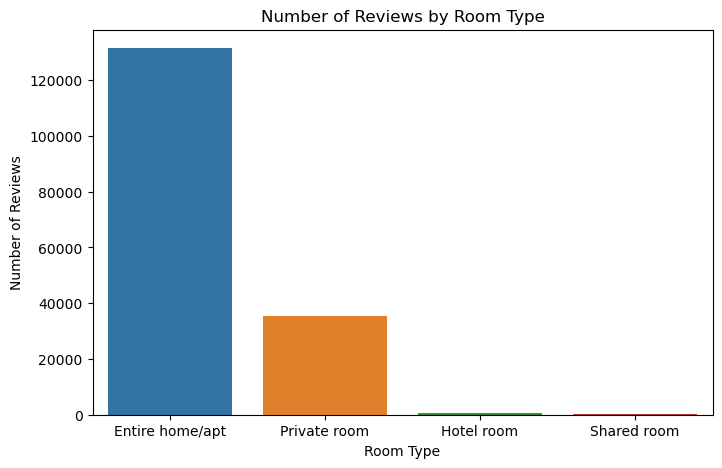

In [56]:
# Reviews by room type - reflect customer preferences for different types of accommodations
plt.figure(figsize = (8,5))
sns.countplot(data=df, x='room_type')
plt.title('Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Reviews')
plt.show()

/Users/gulyagurbanova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


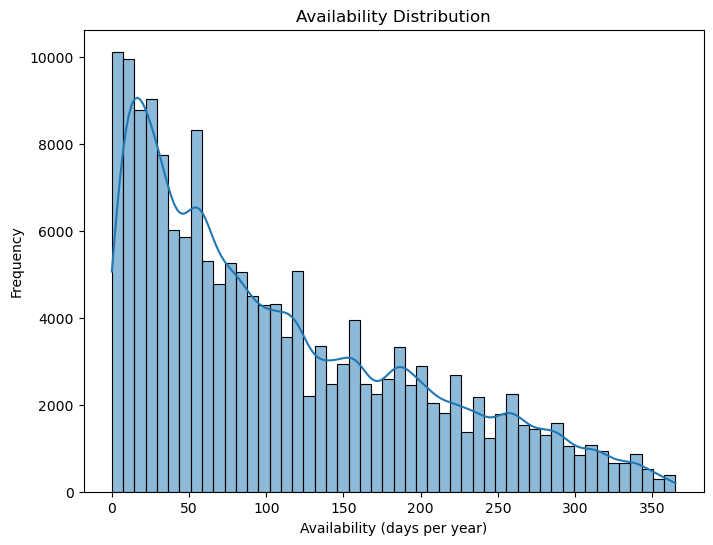

In [57]:
# Availability Distribution - to understand booking patterns and how frequently listings are available
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='availability_365', bins=50, kde=True)
plt.title('Availability Distribution')
plt.xlabel('Availability (days per year)')
plt.ylabel('Frequency')
plt.show()

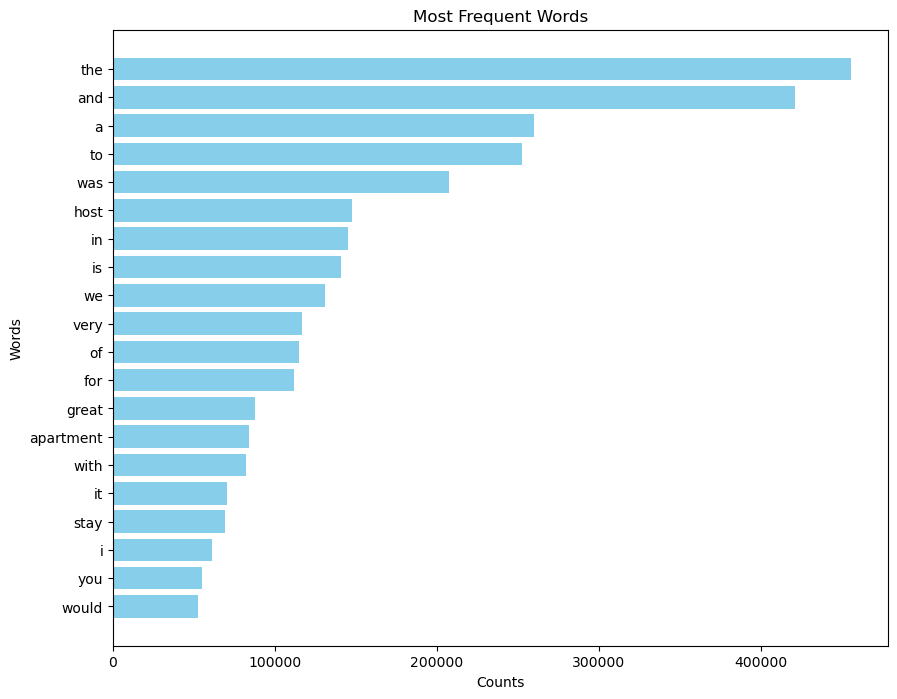

In [58]:
# Concatenating all comments into a single string
all_comments = ' '.join(df['comments'])

# Splitting the string into individual words
word_list = all_comments.split()

# Counting the frequency of each word
word_freq = Counter(word_list)

# Getting the most common words and their counts
most_common_words = word_freq.most_common(20)  # Adjust the number as needed
words, counts = zip(*most_common_words)  # Unzip the list of tuples into two lists

# Creating a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Words')
plt.title('Most Frequent Words')
plt.gca().invert_yaxis()  # Inverting the y-axis to have the highest count at the top
plt.show()

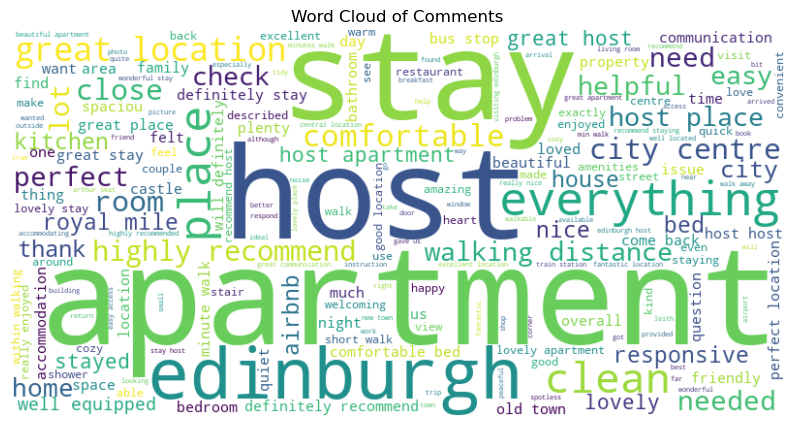

In [59]:
# Word Cloud of Comments - most frequent words in customer reviews
text = ' '.join(df['comments'].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color='white').generate(text)

plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()